# Exploratory data analysis(EDA)
- [Exploratory data analysis](https://en.wikipedia.org/wiki/Exploratory_data_analysis)

In [1]:
import csv

In [3]:
file_path = 'dds_datasets/dds_ch2_nyt/nyt1.csv'

In [2]:
with open(file_path, 'r') as csv_file:
    reader = csv.DictReader(csv_file)
    for row in reader:
        print(row)
        break

OrderedDict([('Age', '36'), ('Gender', '0'), ('Impressions', '3'), ('Clicks', '0'), ('Signed_In', '1')])


In [12]:
age_break_point = (
    17,
    24,
    34,
    44,
    54,
    64,
)
age_group = {}

def grouping(row):
    age = row['Age']
    for break_point in age_break_point:
        if int(age) > break_point:
            continue
        key = f'-{break_point}'
        group = age_group.setdefault(key, [])
        group.append(row)
        age_group[key] = group
        break
    else:
        key = f'65+'
        group = age_group.setdefault(key, [])
        group.append(row)
        age_group[key] = group

In [13]:
with open(file_path, 'r') as csv_file:
    reader = csv.DictReader(csv_file)
    for row in reader:
        grouping(row)

In [14]:
age_group.keys()

dict_keys(['-44', '65+', '-34', '-54', '-17', '-24', '-64'])

In [15]:
len(age_group['-17'])

150934

# 6개의 나이 범주에 대한 노출횟수와 클릭률의 분포 도표
### CTR = clicks / impressions

In [45]:
import collections
import math
import re
import numpy
import matplotlib.pyplot as plt

number = re.compile('[^\d]')

In [32]:
help(plt.plot)

Help on function plot in module matplotlib.pyplot:

plot(*args, **kwargs)
    Plot lines and/or markers to the
    :class:`~matplotlib.axes.Axes`.  *args* is a variable length
    argument, allowing for multiple *x*, *y* pairs with an
    optional format string.  For example, each of the following is
    legal::
    
        plot(x, y)        # plot x and y using default line style and color
        plot(x, y, 'bo')  # plot x and y using blue circle markers
        plot(y)           # plot y using x as index array 0..N-1
        plot(y, 'r+')     # ditto, but with red plusses
    
    If *x* and/or *y* is 2-dimensional, then the corresponding columns
    will be plotted.
    
    If used with labeled data, make sure that the color spec is not
    included as an element in data, as otherwise the last case
    ``plot("v","r", data={"v":..., "r":...)``
    can be interpreted as the first case which would do ``plot(v, r)``
    using the default line style and color.
    
    If not used wi

In [34]:
def cal_ctr(data):
    impressions = float(data.get('Impressions'))
    if impressions == 0:
        return 0.0
    return float(data.get('Clicks')) / impressions

In [35]:
colorset = ['b', 'g', 'r', 'c', 'm', 'y', 'k']
age_ctr = []
for i, key in enumerate(age_group.keys()):
    rows = age_group[key]
    age = key
    x = [int(number.sub('', age)) for i in range(len(rows))]
    y = []
    for row in rows:
        y.append(cal_ctr(row))
    age_ctr.append(x)
    age_ctr.append(y)
    age_ctr.append(f'{colorset[i]}o')

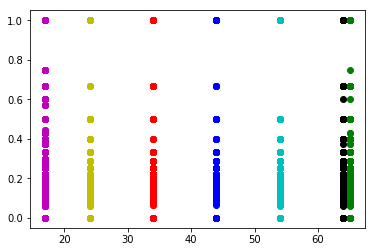

In [37]:
plt.plot(*age_ctr)
plt.show()

In [59]:
def render_graph(*args):
    plt.plot(*args)
    plt.show()

In [62]:
def count_data(i, ag):
    ctrs = []
    for row in ag:
        ctrs.append(round(cal_ctr(row), 2))
    counter = collections.Counter(ctrs)
    sorted_list = sorted(counter.items(), key=lambda x: x[0])
    xy = list(zip(*sorted_list))
    xy.append(f'{colorset[i]}-')
    return xy

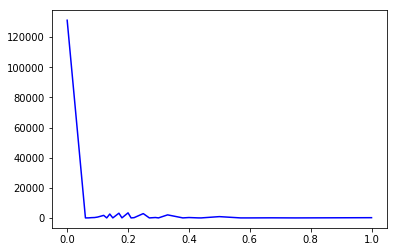

In [63]:
render_graph(*count_data(0, age_group['-17']))

In [64]:
data = []
for i, key in enumerate(age_group.keys()):
    data += count_data(i, age_group[key])

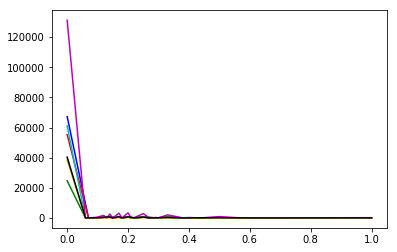

In [65]:
render_graph(*data)